In [116]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")
from pmdarima import auto_arima

# Load Data

In [20]:
# Read csv with total net sales daily
df = pd.read_csv('net_sales_total.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Read csv with daily weather
weather_df = pd.read_csv('dark_sky_api.csv')
weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df = weather_df.rename(columns={'time':'date'})
weather_df = weather_df.set_index('date')

# Merge both dataframes
df = df.merge(weather_df, on='date')

### Daily EDA

Plotting daily sales for whole dataset

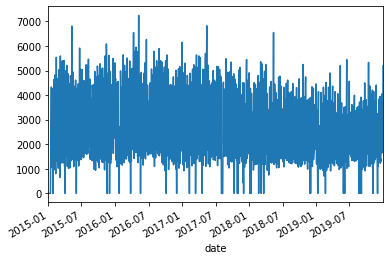

In [53]:
df['total'].plot()

Plotting daily max temp for whole dataset

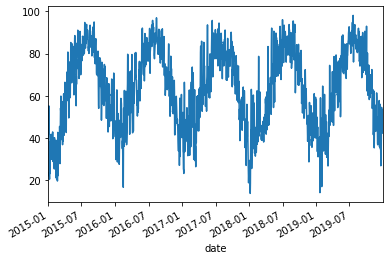

In [127]:
df['temperatureMax'].plot()

Plotting Rolling Mean for 30 days

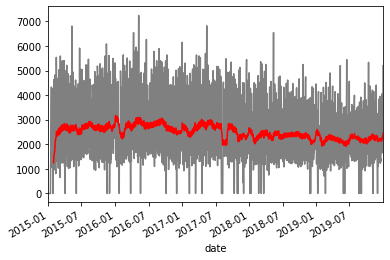

In [83]:
r = df.rolling(window = 30)
df['total'].plot(color = 'gray')
r.mean()['total'].plot(color = 'red')

In [88]:
total = df[['total']]

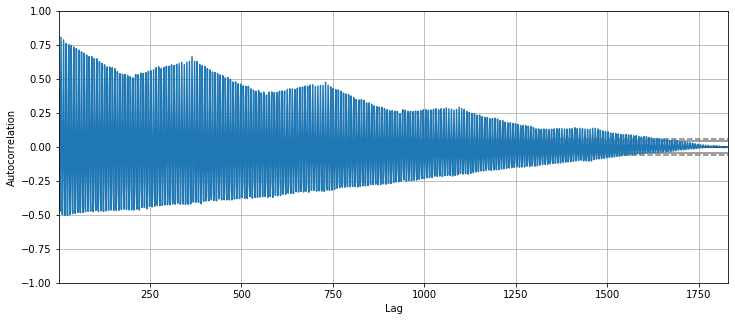

In [89]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(total);

In [90]:
temp_max = df[['temperatureMax']]

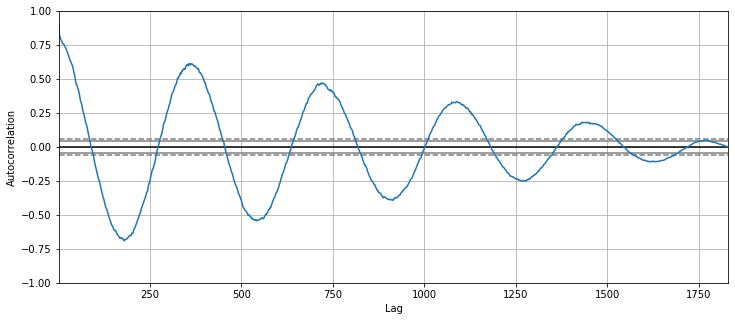

In [91]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(temp_max);

### Monthly EDA

In [128]:
total_monthly = df['total'].resample('MS').mean()

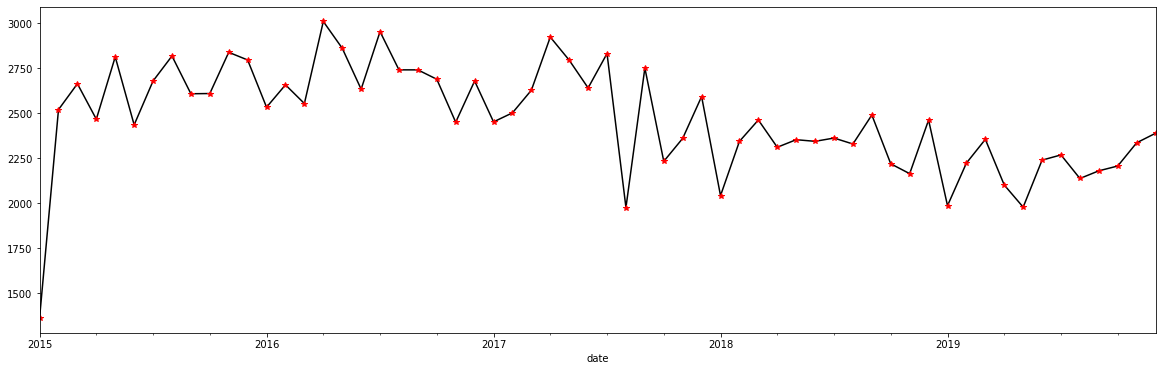

In [137]:
total_monthly.plot(figsize = (20, 6), style = '-', color = 'black')
total_monthly.plot(figsize = (20, 6), style = '*', color = 'red')
plt.show()

In [163]:
total_year_groups = total_monthly.groupby(pd.Grouper(freq ='A'))

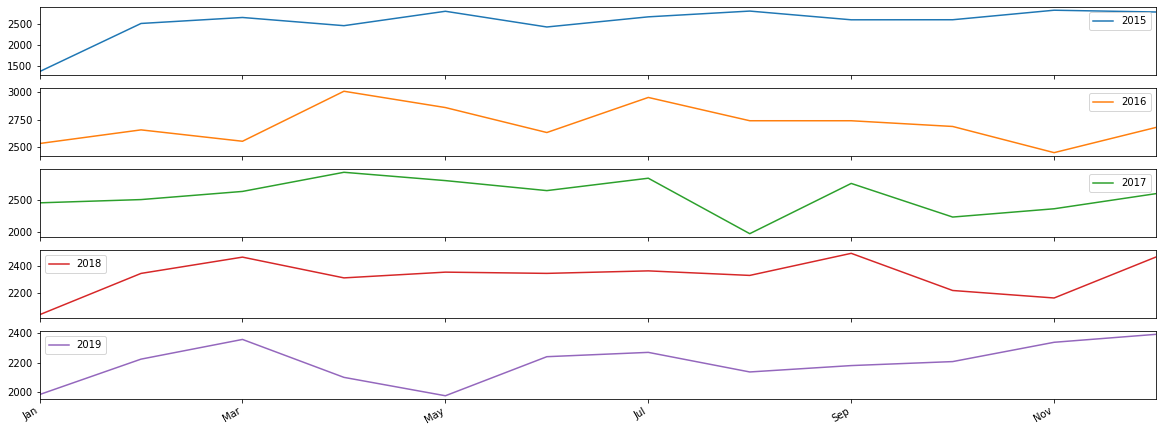

In [167]:
# Create a new DataFrame and store yearly values in columns 
total_annual = pd.DataFrame()

for yr, group in total_year_groups:
    total_annual[yr.year] = group.values.ravel()
    
total_annual = total_annual.rename({0:'Jan', 1:'Feb', 2:'Mar', 3:'Apr', 
                                     4:'May', 5:'Jun', 6:'Jul', 7:'Aug', 
                                     8:'Sep', 9:'Oct', 10:'Nov', 11:'Dec'})
    
# Plot the yearly groups as subplots
total_annual.plot(figsize = (20,8), subplots=True, legend=True);

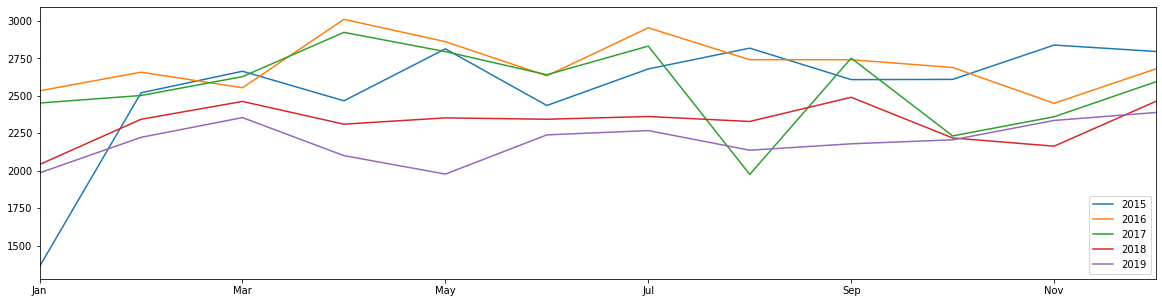

In [168]:
total_annual.plot(figsize = (20,5), subplots=False, legend=True);

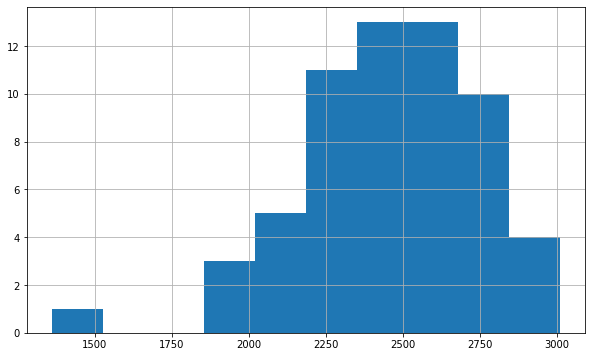

In [183]:
total_monthly.hist(figsize = (10,6), bins = 10);

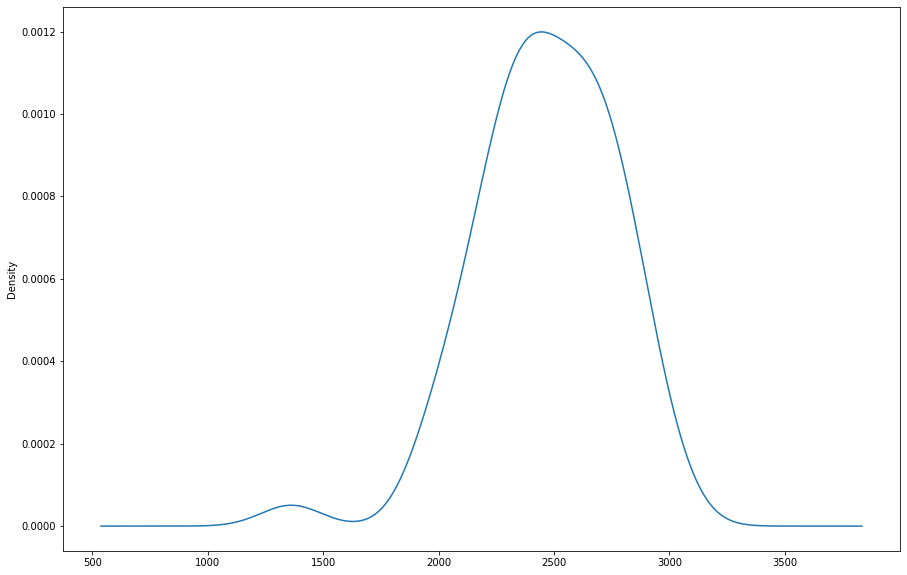

In [184]:
total_monthly.plot(kind='kde', figsize = (15,10));

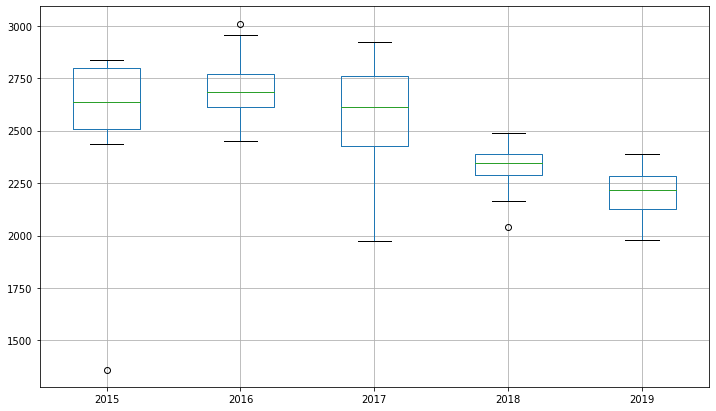

In [185]:
total_annual.boxplot(figsize = (12,7));

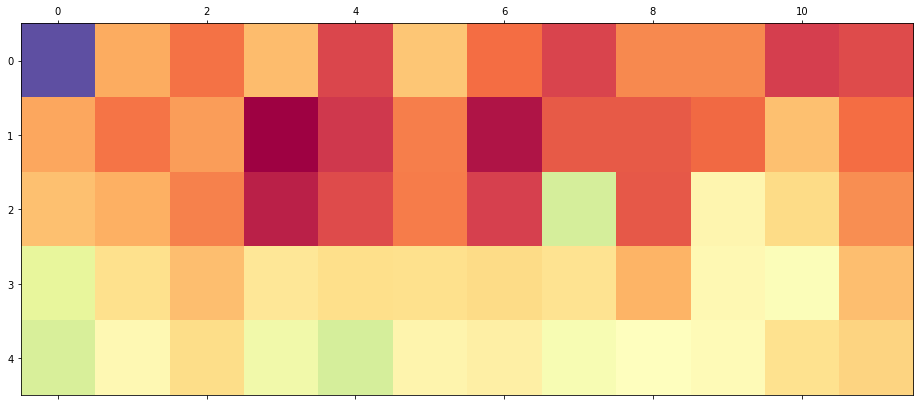

In [186]:
year_matrix = total_annual.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

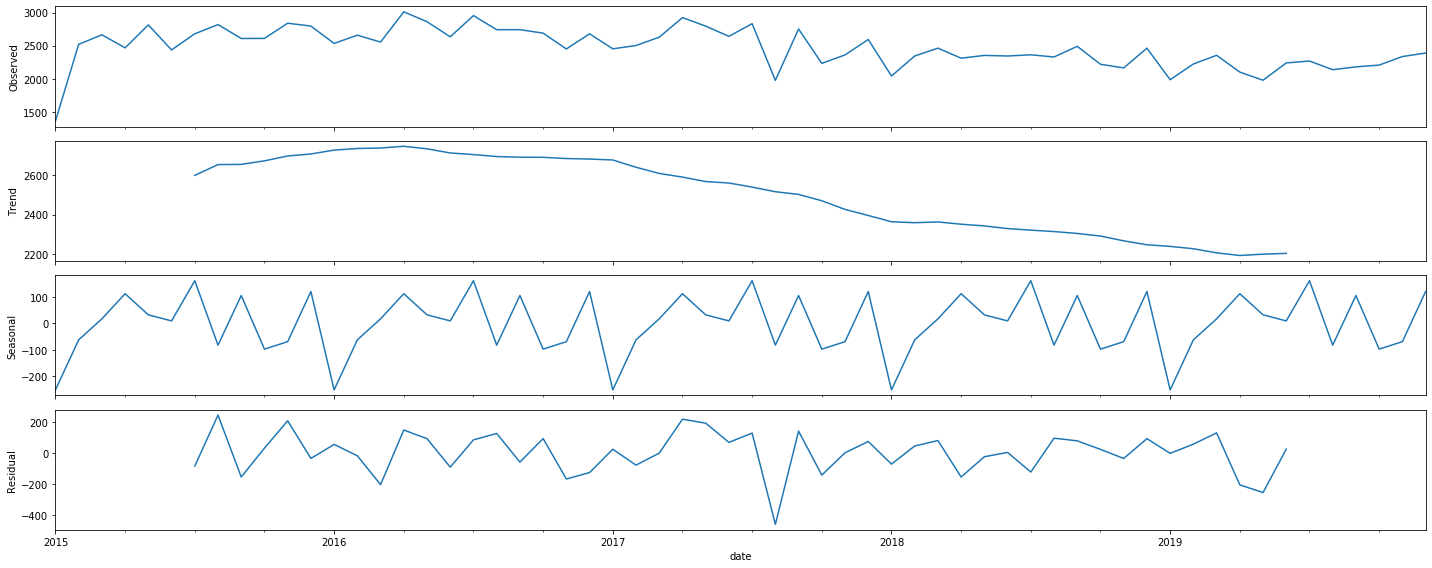

In [169]:
rcParams['figure.figsize'] = 20, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()